<a href="https://colab.research.google.com/github/aniket-deshmukh-data/Capstone-Project-Hotel-Booking-Analysis-Aniket-Deshmukh/blob/main/Hotel_Booking_Analysis_Aniket_Deshmukh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Introduction**
Hotel industry is a very volatile industry and the bookings depend on variety of factors such as type of hotels, seasonality, days of week and many more. This makes analyzing the patterns available in the past data more important to help the hotels plan better. Using the historical data, hotels can perform various campaigns to boost the business. We can use the patterns to predict the future bookings using time series or decision trees.

We will be using the data available to analyze the factors affecting the hotel bookings. These factors can be used for reporting the trends and predict the future bookings.

# **Objective**
This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data.

We will perform exploratory data analysis with python to get insight from the data.

# **Explore and Analyze the data**

In [2]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [4]:
# read all data and save in dataframe.
file_path=('/content/drive/MyDrive/Hotel Booking Analysis-Aniket Deshmukh')
df=pd.read_csv(file_path+'/Hotel Bookings.csv')

In [5]:
#check column index
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [58]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people,Num_of_bookings
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,...,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.00000,119389.000000,0.0
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,0.927606,2.500314,1.856402,0.103887,0.007949,...,0.221118,74.828845,10.775247,2.321169,101.786744,0.062518,0.571368,3.42792,1.968238,NaN
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.998614,1.908289,0.579263,0.398557,0.097437,...,0.652304,107.142248,53.944101,17.594793,48.153554,0.245292,0.792800,2.55744,0.722397,NaN
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.00000,0.000000,NaN
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000,2.00000,2.000000,NaN
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,9.000000,0.000000,0.000000,94.560000,0.000000,0.000000,3.00000,2.000000,NaN
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.00000,2.000000,NaN
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,21.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,69.00000,55.000000,NaN


# **Data Cleaning**

check each column and validate missing values, duplicate values, null values and datatypes

In [8]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [9]:
df['is_canceled'].unique()

array([0, 1])

In [10]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [11]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [12]:
# remove null values and change datatypes
df['children'].fillna(0, inplace = True)
df['children'] = df['children'].astype('int64')
df['children'].unique()

array([ 0,  1,  2, 10,  3])

In [13]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [14]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [15]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [16]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [17]:
df['is_repeated_guest'].unique()

array([0, 1])

In [18]:
df['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [19]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [20]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [21]:
df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [22]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [23]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [24]:
df['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [25]:
df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [26]:
df['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [27]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [28]:
df[df.duplicated()].shape

(31994, 32)

In [29]:
df[df.duplicated()].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08


In [30]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

In [31]:
#find null values present in database
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
hotel                                  0
days_in_waiting_list                   0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
customer_type                          0
previous_bookings_not_canceled         0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
total_stay                             0
reserved_room_type                     0
previous_cancellations                 0
is_canceled                            0
is_repeated_guest                      0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
children        

In [32]:
df['country'].fillna('others', inplace = True)  #fill other if null values in country
df[['company','agent']] = df[['company','agent']].fillna(0)  #fill 0 in company and agent column

# **Find Insights from given Dataset.**

##**1. Find percentage of available types of hotel?**

Text(0.5, 1.0, 'Available types of hotel')

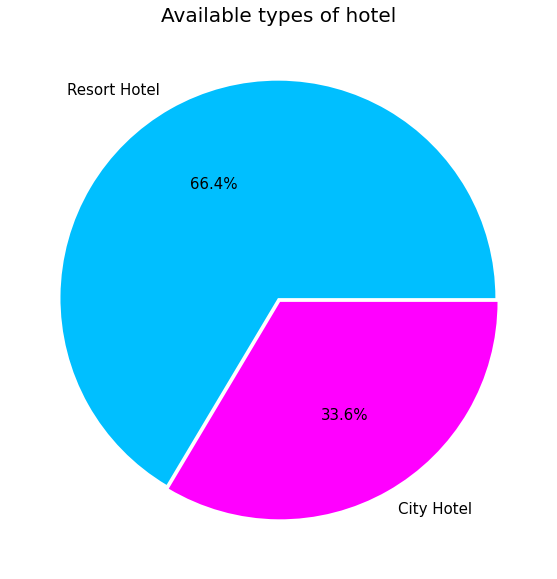

In [61]:
Type_df=df['hotel'].value_counts()
labels = ['Resort Hotel', 'City Hotel']
plt.figure(figsize=(10,10))
colors = ['deepskyblue','magenta']
plt.pie(Type_df, labels = labels, autopct='%1.1f%%', colors=colors,explode=(0.01,0.01),textprops={'fontsize': 15})
plt.title('Available types of hotel',size=20,loc='center')

### **Insights**
Resort hotel has almost double percentage than city hotel.

## **2. Find number of bookings in perticular month?**

Text(0.5, 1.0, 'Number of booking in perticular month')

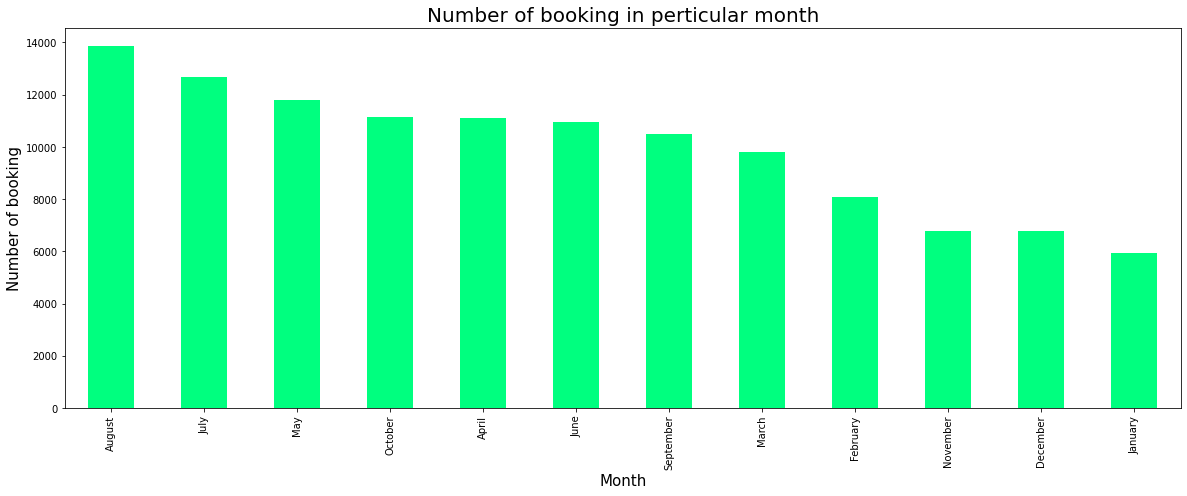

In [37]:
plt.figure(figsize=(20,7))
df_arrival_month=df['arrival_date_month'].value_counts()
df_arrival_month.plot.bar(color='springgreen')
plt.xlabel("Months",fontsize =15)
plt.ylabel("Number of booking",fontsize =15)
plt.title("Number of booking in perticular month",fontsize =20)

### **Insights**
August month has highest number of booking and january month has lowest number of booking.

## **3. Find number of bookings in perticular year?**

Text(0.5, 1.0, 'Year wise distribution of number of booking')

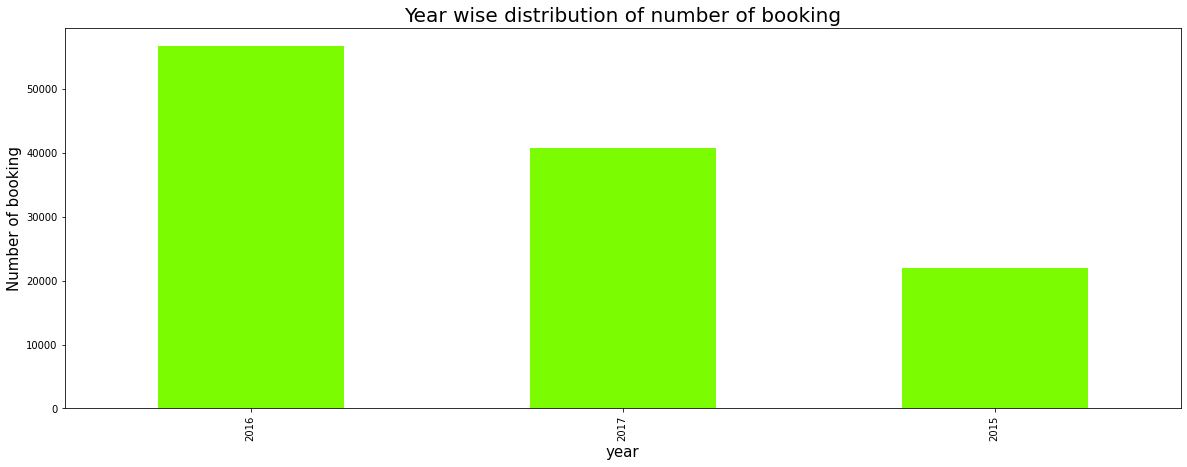

In [62]:
plt.figure(figsize=(20,7))
df_arrival_year=df['arrival_date_year'].value_counts()
df_arrival_year.plot.bar(color='lawngreen')
plt.xlabel("year",fontsize =15)
plt.ylabel("Number of booking",fontsize =15)
plt.title("Year wise distribution of number of booking",fontsize =20)

### **Insights**
2016 has higher bookings than 2015 and 2017.

From 2015 number of bookings increases in 2016 but booking decreases in 2017.

## **4. Find number of bookings vs mode of bookings?**

Text(0.5, 1.0, 'Number of booking vs mode of booking')

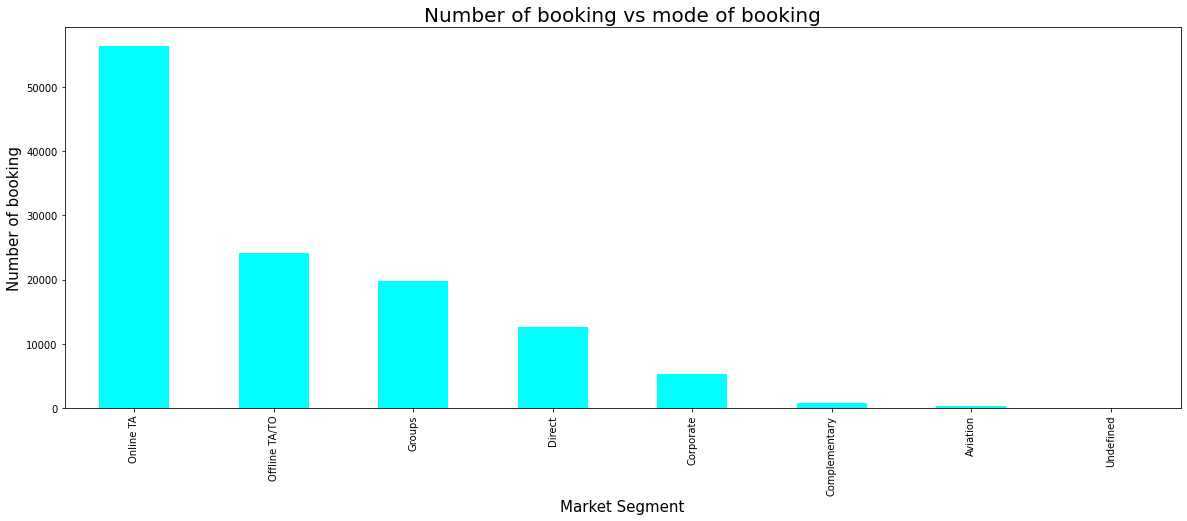

In [69]:
plt.figure(figsize=(20,7))
df_market_segment=df['market_segment'].value_counts()
df_market_segment.plot.bar(color='cyan')
plt.xlabel("Market Segment",fontsize =15)
plt.ylabel("Number of booking",fontsize =15)
plt.title("Number of booking vs mode of booking",fontsize =20)

### **Insights**
From above graph we can say that Online booking has almost same as sum of other mode of bookings.

## **5. Average daily ratings vs total stay**

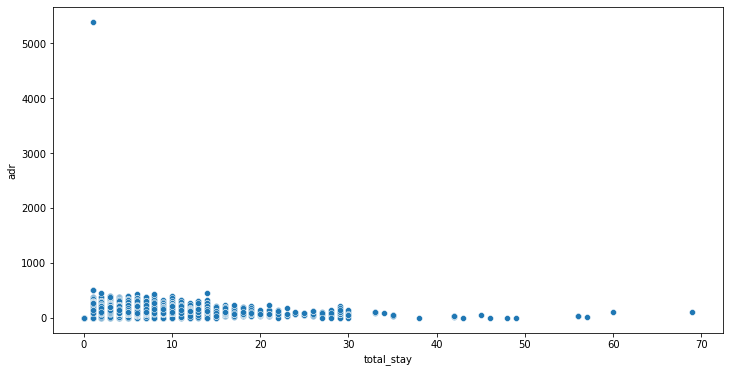

In [42]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

In [44]:
#there is one outlier remove that for smooth operation
df.drop(df[df['adr'] > 5000].index, inplace = True)

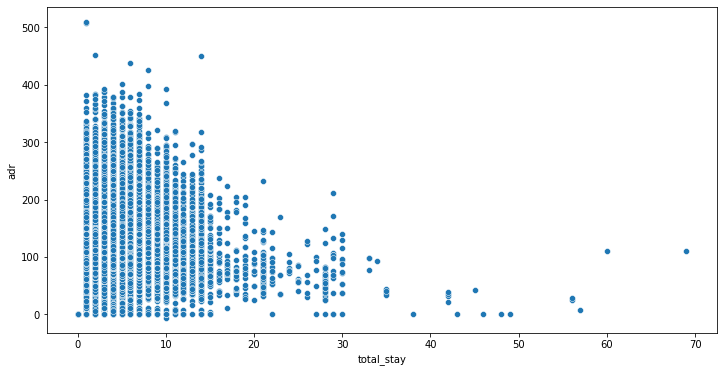

In [45]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df)
plt.show()

### **Insights**
From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

## **6. Which room type is in most demand and which room type generate highest adr?**

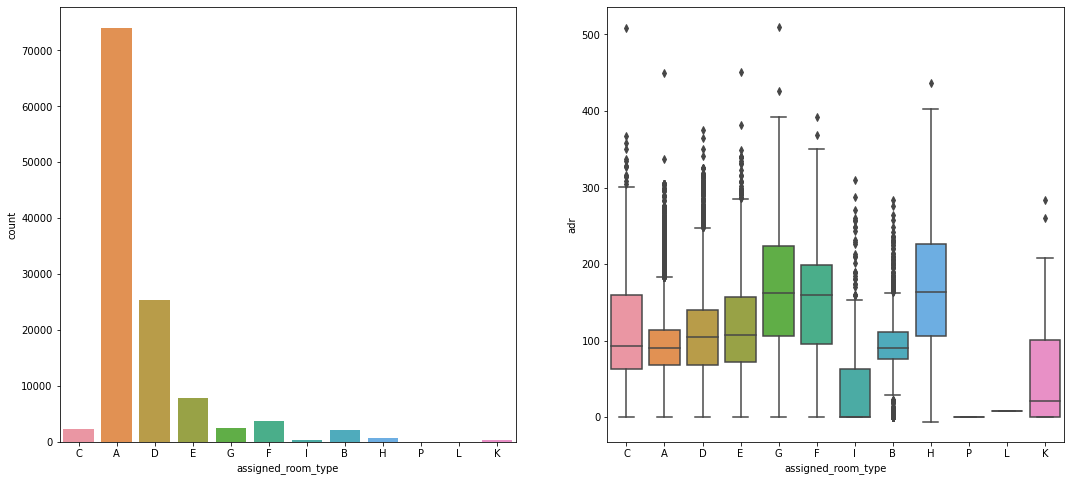

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df.groupby('assigned_room_type')
df['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df['assigned_room_type'], y = df['adr'])
plt.show()

### **Insights**
Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

## **7. Find some insights in Country wise booking.** 

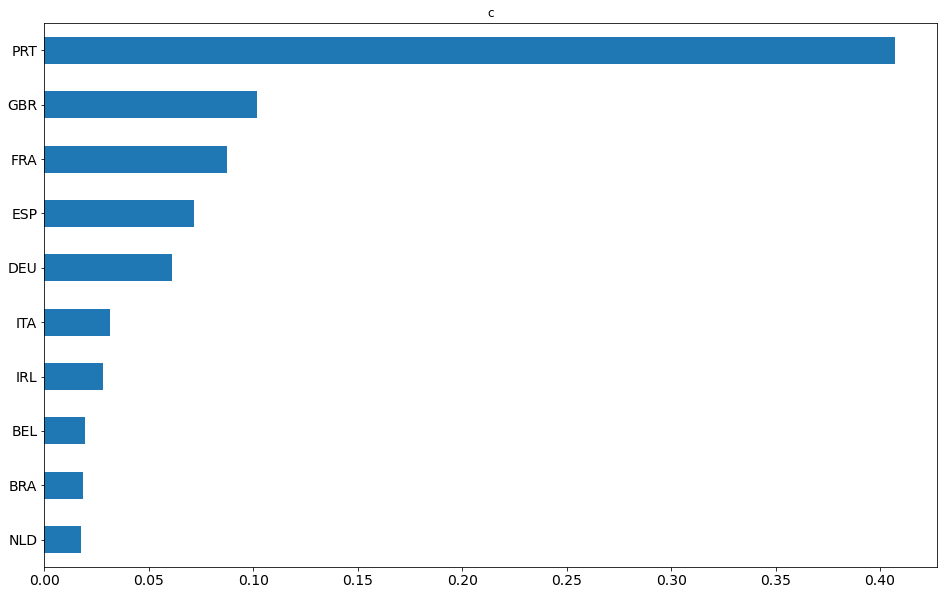

In [52]:
fig, axes = plt.subplots(1, 1, figsize=(16, 10)) 
_ = df['country'].value_counts(normalize=True).head(10).sort_values(ascending=True).plot(kind = 'barh', title='c', fontsize=14)

### **Insights**
PRT has highest number of booking.

## **8. Find Number of booking and  cancellation from that booking.**

[Text(0.5, 1.0, 'The Booking Status in the Hospitality Industry')]

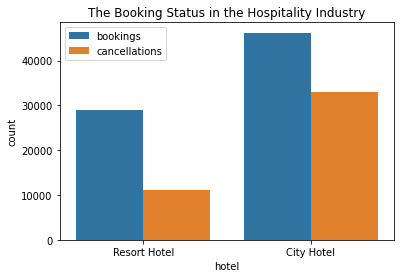

<Figure size 1440x504 with 0 Axes>

In [67]:
df_cancellation = sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.figure(figsize=(20,7))
df_cancellation.legend(['bookings','cancellations'])
df_cancellation.set(title='The Booking Status in the Hospitality Industry')

### **Insights**
Resort hotel has maximum cancellation than city hotel.

## **9. Find correlation between some selected columns**

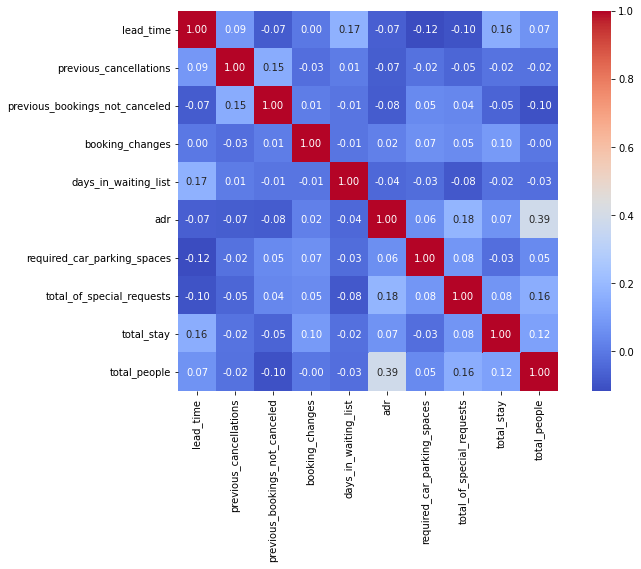

In [57]:
num_df = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(num_df.corr(), annot = True,fmt='.2f', annot_kws={'size': 10},cmap='coolwarm',  vmax=1, square=True);

### **Insights**
1) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

# **Conclusion**
1) Resort hotel has almost double percentage than city hotel.

2) August month has highest number of booking and january month has lowest number of booking.

3) 2016 has higher bookings than 2015 and 2017.

4) From 2015 number of bookings increases in 2016 but booking decreases in 2017.

5) we can say that Online booking has almost same as sum of other mode of bookings.

6) From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

7) Most demanded room type is A, but better adr rooms are of type H, G and C also. Hotels should increase the no. of room types A and H to maximise revenue.

8) PRT has highest number of booking.

9) Resort hotel has maximum cancellation than city hotel.

10) Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

11) adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.